# ZS DS Challenge

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_intAeractivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
#Read file from google drive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 3.4MB/s 


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 6446727 bytes


In [0]:
data = pd.read_csv('data.csv', usecols=range(1,28))

In [0]:
data.head(4)

match_event_id  location_x  ...  remaining_sec.1  distance_of_shot.1
0            10.0       167.0  ...          54.2000                38.0
1            12.0      -157.0  ...          22.0000                35.0
2            35.0      -101.0  ...          63.7216                54.4
3            43.0       138.0  ...          52.0000                42.0

[4 rows x 27 columns]

In [0]:
# df_test = df[df.is_goal.isna()]

In [0]:
# Test Set
# df_test

In [0]:
# Train set
# df_train = df[~df['is_goal'].isna()]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-null object
type_of_shot             15417 non-

In [0]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

match_event_id 0.051  % missing values
location_x 0.048  % missing values
location_y 0.05  % missing values
remaining_min 0.051  % missing values
power_of_shot 0.048  % missing values
knockout_match 0.049  % missing values
game_season 0.191  % missing values
remaining_sec 0.052  % missing values
distance_of_shot 0.051  % missing values
is_goal 0.204  % missing values
area_of_shot 0.049  % missing values
shot_basics 0.051  % missing values
range_of_shot 0.051  % missing values
team_name 0.05  % missing values
date_of_game 0.05  % missing values
home/away 0.049  % missing values
shot_id_number 0.051  % missing values
lat/lng 0.051  % missing values
type_of_shot 0.498  % missing values
type_of_combined_shot 0.502  % missing values
remaining_min.1 0.05  % missing values
power_of_shot.1 0.05  % missing values
knockout_match.1 0.049  % missing values
remaining_sec.1 0.05  % missing values
distance_of_shot.1 0.051  % missing values


Data set contain missing values which will be treated later.

#### Relationship between values being missing and Is_goal

Let's evaluate the Is_goal for those cases where the information is missing, for each variable.

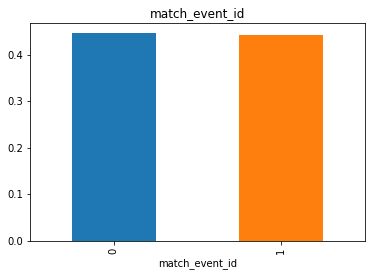

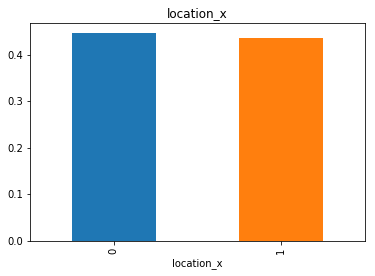

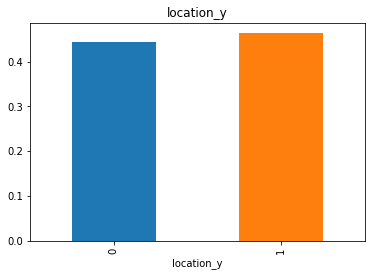

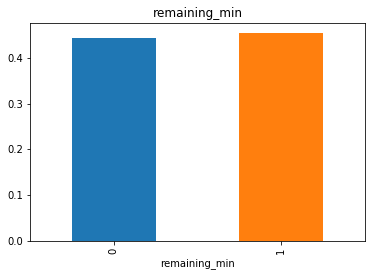

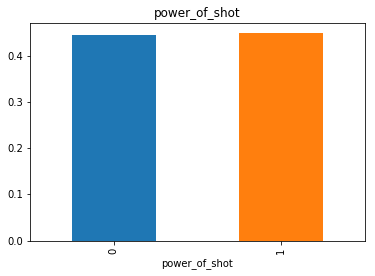

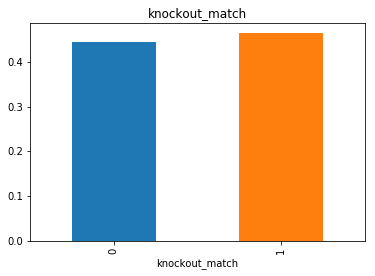

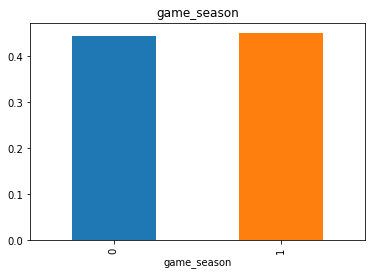

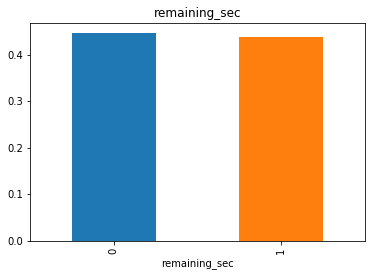

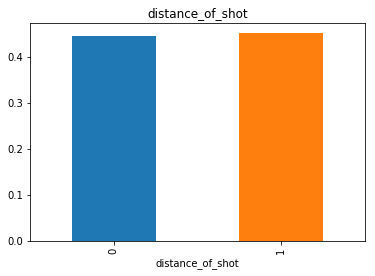

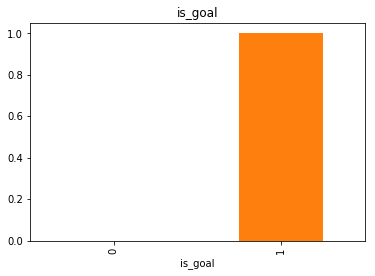

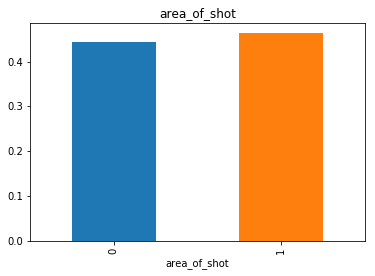

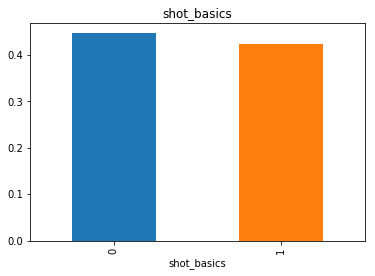

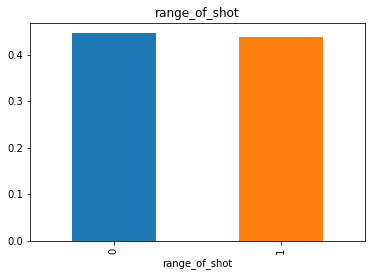

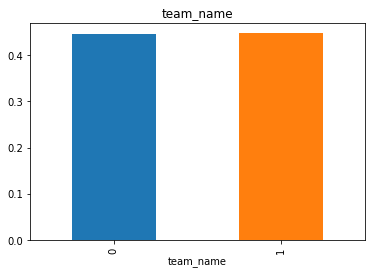

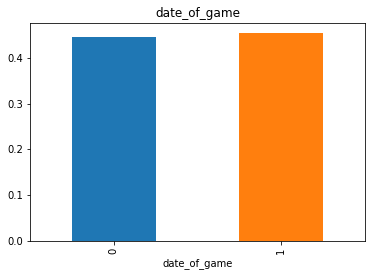

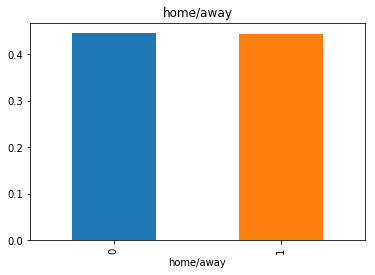

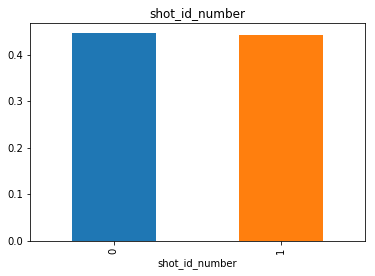

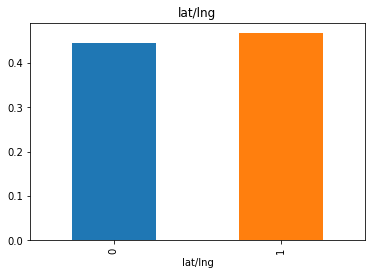

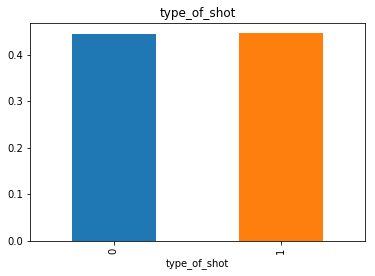

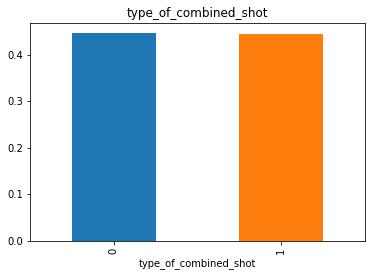

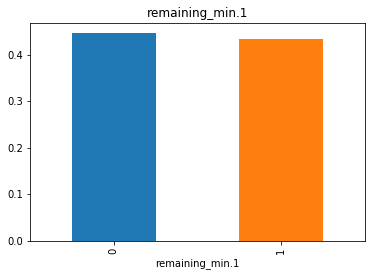

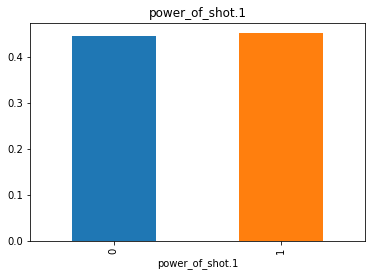

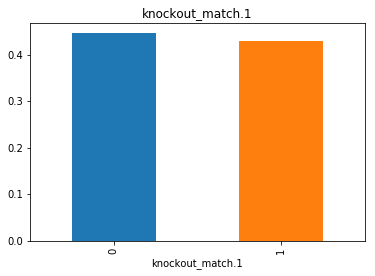

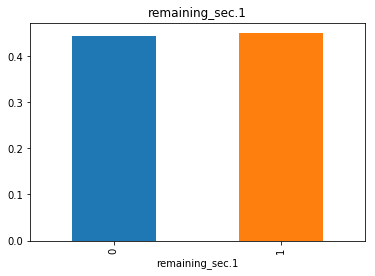

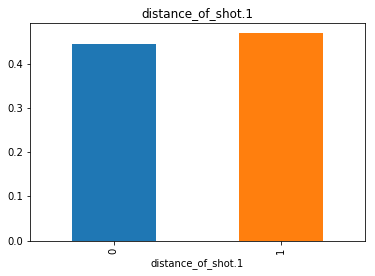

In [0]:
def analyse_na_value(df,var):
    df = data.copy()
    
    # Variable has value 1 when info is missing and o otherwise
    
    df[var] = np.where(df[var].isnull(),1,0)
    
    # calculate the is_goal if the info is  missing or present.
    df.groupby(var)['is_goal'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data,var)
    

In [0]:
# information missing is relevant for us hence we will treat them

In [0]:
# Verify if there is not huge difference and a need of upsampling or downsampling.
data.groupby('is_goal').count()

match_event_id  location_x  location_y  remaining_min  power_of_shot  \
is_goal                                                                         
0.0               12859       12898       12882          12871          12888   
1.0               10330       10375       10302          10314          10341   

         knockout_match  game_season  remaining_sec  distance_of_shot  \
is_goal                                                                 
0.0               12900        11002          12848             12859   
1.0               10317         8795          10331             10313   

         area_of_shot         ...          lat/lng  type_of_shot  \
is_goal                       ...                                  
0.0             12915         ...            12885          6827   
1.0             10332         ...            10297          5466   

         type_of_combined_shot  match_id  team_id  remaining_min.1  \
is_goal                                                              
0.0                       6723     13550    13550            12866   
1.0                       5413     10879    10879            10354   

         power_of_shot.1  knockout_match.1  remaining_sec.1  \
is_goal                                                       
0.0                12886             12857            12890   
1.0                10335             10358            10339   

         distance_of_shot.1  
is_goal                      
0.0                   12889  
1.0                   10296  

[2 rows x 26 columns]

### Numerical Variables
Let us find out what numerical vars are in dataset

In [0]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of num variables:', len(num_vars))

data[num_vars].head()

Number of num variables: 17


match_event_id  location_x  location_y  remaining_min  power_of_shot  \
0            10.0       167.0        72.0           10.0            1.0   
1            12.0      -157.0         0.0           10.0            1.0   
2            35.0      -101.0       135.0            7.0            1.0   
3            43.0       138.0       175.0            6.0            1.0   
4           155.0         0.0         0.0            NaN            2.0   

   knockout_match  remaining_sec  distance_of_shot  is_goal  shot_id_number  \
0             0.0           27.0              38.0      NaN             1.0   
1             0.0           22.0              35.0      0.0             2.0   
2             0.0           45.0              36.0      1.0             3.0   
3             0.0           52.0              42.0      0.0             4.0   
4             0.0           19.0              20.0      1.0             5.0   

   match_id     team_id  remaining_min.1  power_of_shot.1  knockout_match.1  \
0  20000012  1610612747            10.00              1.0            50.608   
1  20000012  1610612747            10.00              1.0            28.800   
2  20000012  1610612747            92.64              1.0             0.000   
3  20000012  1610612747              NaN              1.0           122.608   
4  20000012  1610612747            42.64              2.0             0.000   

   remaining_sec.1  distance_of_shot.1  
0          54.2000                38.0  
1          22.0000                35.0  
2          63.7216                54.4  
3          52.0000                42.0  
4          19.0000                20.0

In [0]:
print('Number of Shot match_id labels: ', len(data.shot_id_number.unique()))
print('Number of goals in the Dataset: ', len(data))

Number of Shot match_id labels:  29135
Number of goals in the Dataset:  30697


In [0]:
data['shot_id_number'].isna().sum()

1563

In [0]:
# we can see clearly shot id number is unique for each goal hence we will drop this from the dataset once the exploration is completed
# data.drop(columns='shot_id_number', inplace=True)

# Let us analyse date and year variables which date of game and game season

In [0]:
data['date_of_game'].unique()

array(['2000-10-31', '2000-11-01', '2000-11-04', ..., '2000-06-14',
       '2000-06-16', '2000-06-19'], dtype=object)

In [0]:
data['game_season'].unique()

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

Text(0, 0.5, 'Mean of Goal')

Text(0.5, 0, 'gameseason')

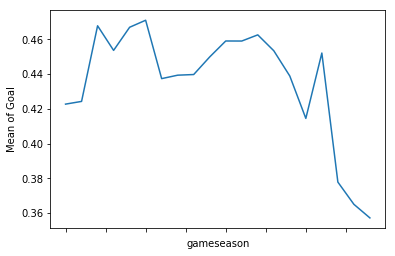

In [0]:
data.groupby('game_season')['is_goal'].mean().plot()
plt.ylabel('Mean of Goal')
plt.xlabel('gameseason')

We can see with the increase in game season there is a drop in goals


In [0]:
# Let us analyse the distribution of numerical variables w.r.t goal

numerical_variables = [var for var in num_vars if len(data[var].unique())]

print ('number of numerical variables:', len(numerical_variables))

number of numerical variables: 17


In [0]:
data[numerical_variables].head()

match_event_id  location_x  location_y  remaining_min  power_of_shot  \
0            10.0       167.0        72.0           10.0            1.0   
1            12.0      -157.0         0.0           10.0            1.0   
2            35.0      -101.0       135.0            7.0            1.0   
3            43.0       138.0       175.0            6.0            1.0   
4           155.0         0.0         0.0            NaN            2.0   

   knockout_match  remaining_sec  distance_of_shot  is_goal  shot_id_number  \
0             0.0           27.0              38.0      NaN             1.0   
1             0.0           22.0              35.0      0.0             2.0   
2             0.0           45.0              36.0      1.0             3.0   
3             0.0           52.0              42.0      0.0             4.0   
4             0.0           19.0              20.0      1.0             5.0   

   match_id     team_id  remaining_min.1  power_of_shot.1  knockout_match.1  \
0  20000012  1610612747            10.00              1.0            50.608   
1  20000012  1610612747            10.00              1.0            28.800   
2  20000012  1610612747            92.64              1.0             0.000   
3  20000012  1610612747              NaN              1.0           122.608   
4  20000012  1610612747            42.64              2.0             0.000   

   remaining_sec.1  distance_of_shot.1  
0          54.2000                38.0  
1          22.0000                35.0  
2          63.7216                54.4  
3          52.0000                42.0  
4          19.0000                20.0

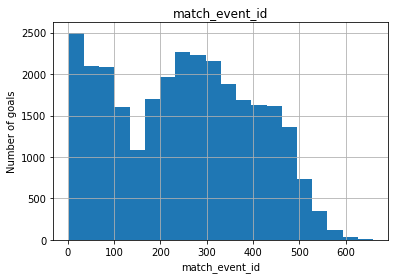

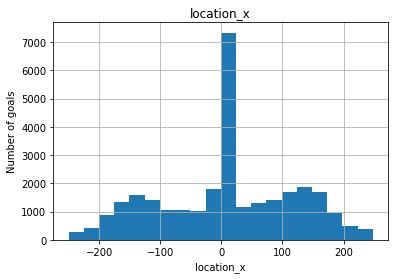

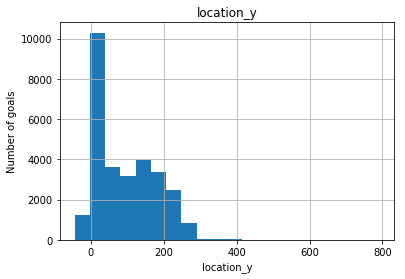

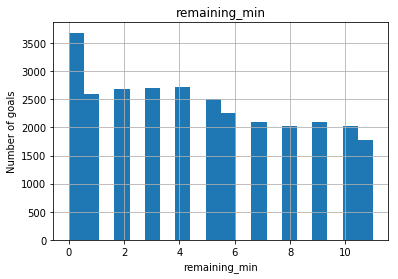

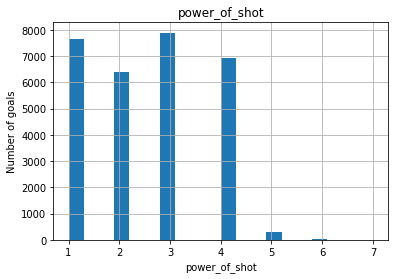

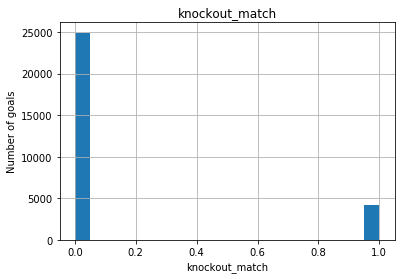

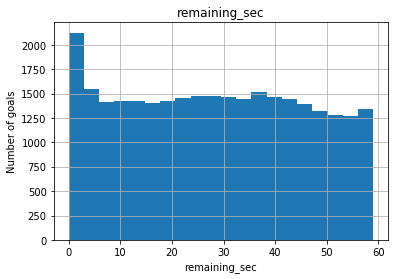

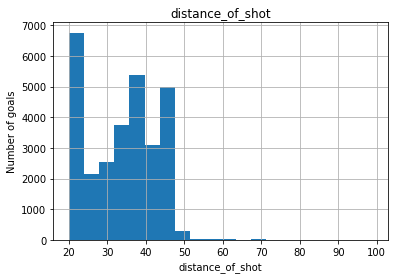

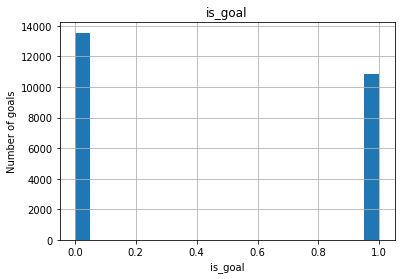

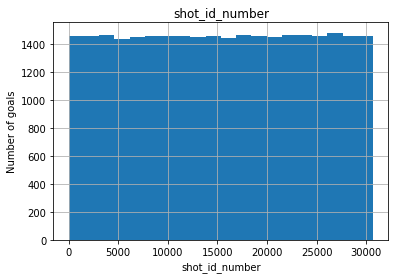

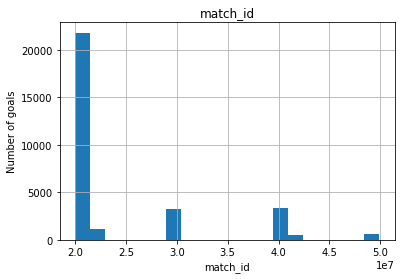

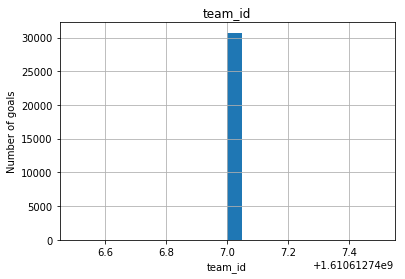

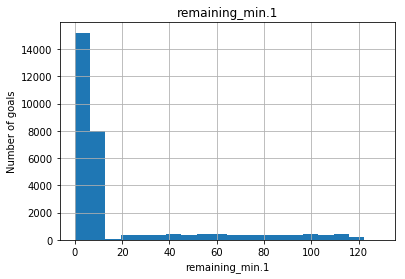

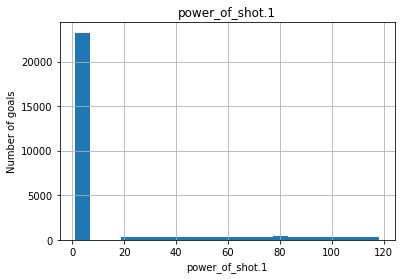

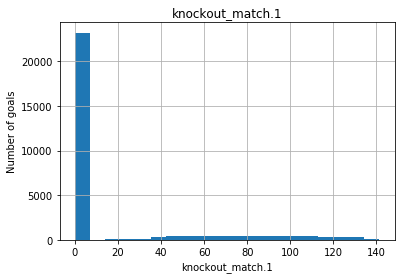

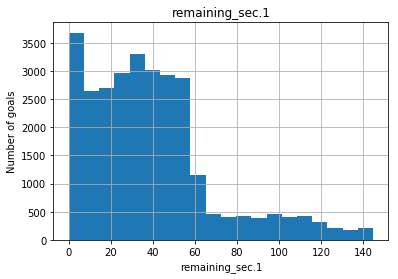

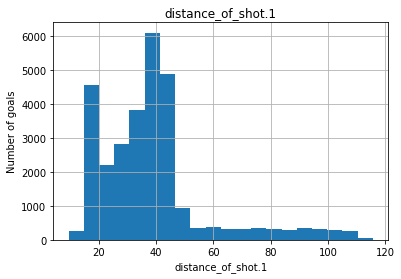

In [0]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of goals')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in numerical_variables:
    analyse_continous(data, var)

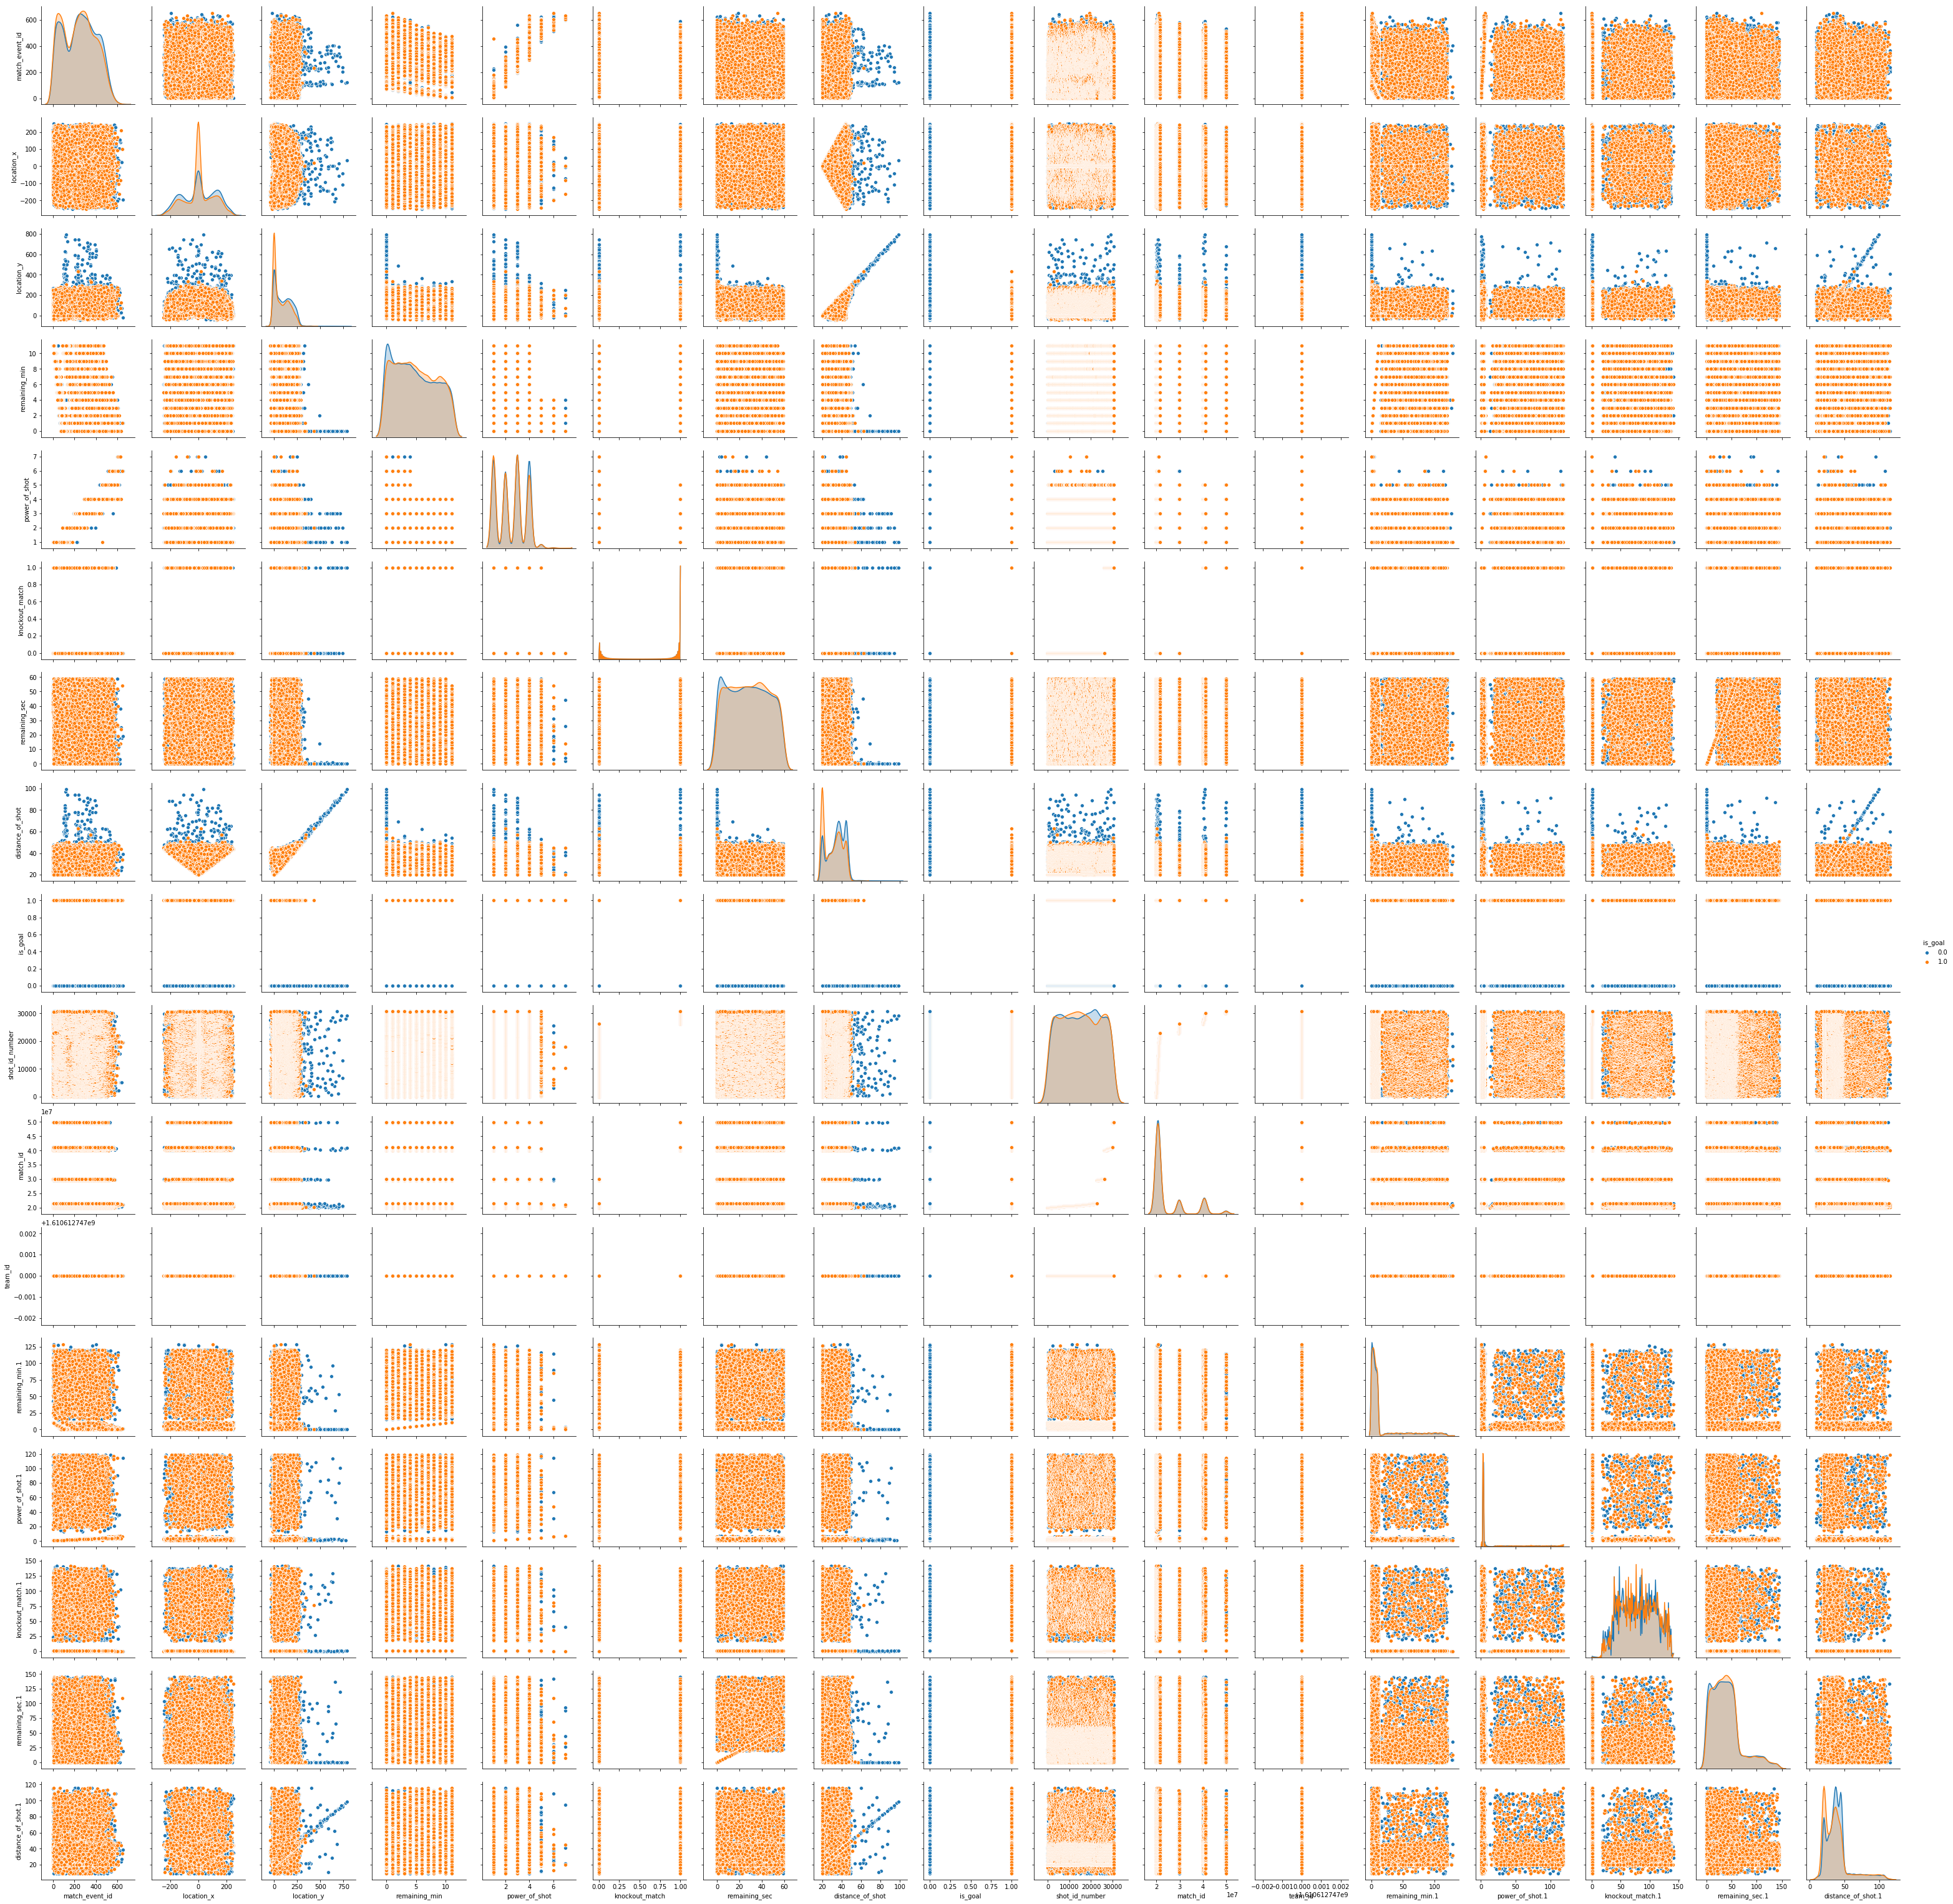

In [0]:
sns.pairplot(data[numerical_variables],diag_kind= 'kde', hue = 'is_goal')

### Insights

- Numerical Variables are rightly skewed and will have to be log transformed for better performance.
- From Pair plot we can observe that there is strong co relation between some variables. we might try PCA in later stage.
- 

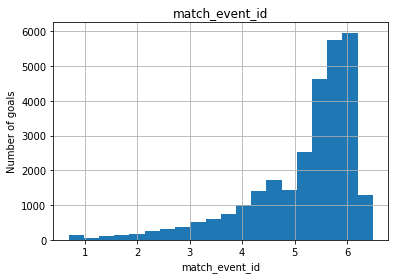

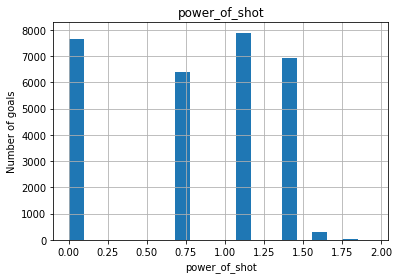

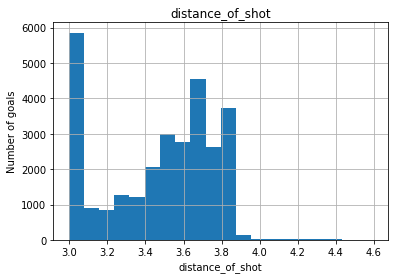

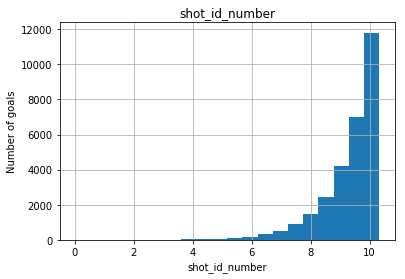

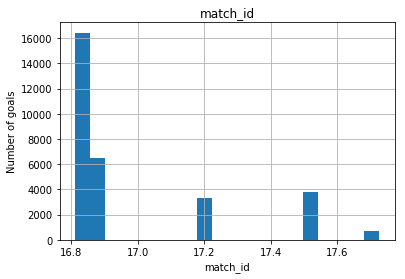

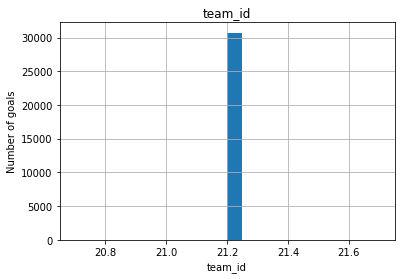

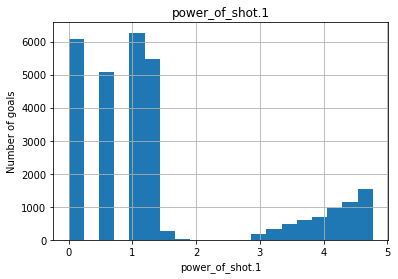

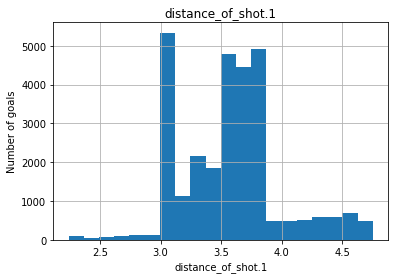

In [0]:
# Let's go ahead and analyse the distributions of these variables post log transformation

def analyse_continous(df, var):
    df = df.copy()
    
    # log transformation to avoid negative value.
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of goals')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in numerical_variables:
    analyse_continous(data, var)

### Outliers

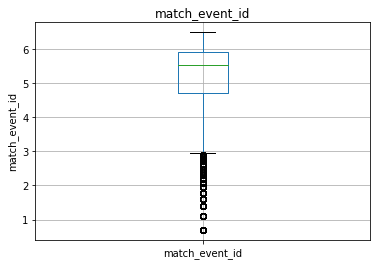

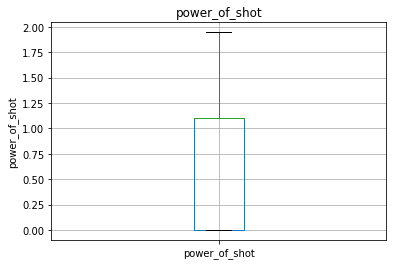

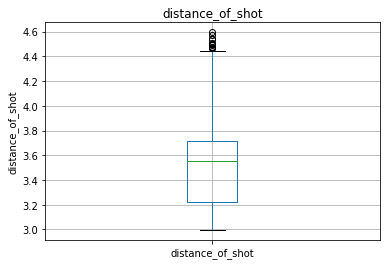

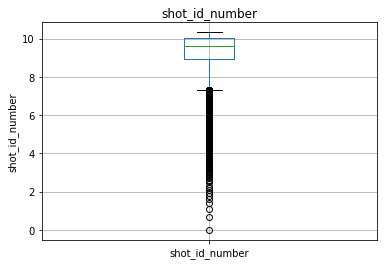

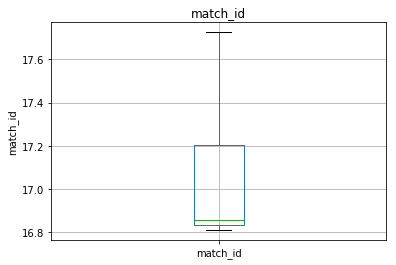

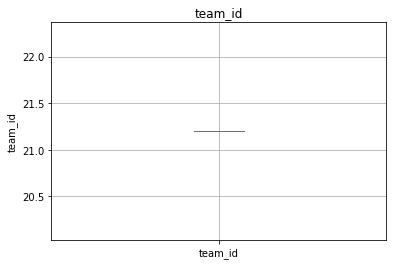

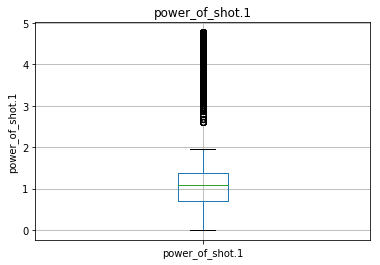

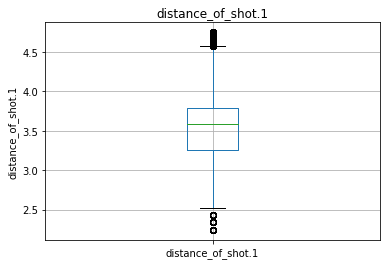

In [0]:
# let us analyse the Outliers
def find_outliers(df,var):
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column = var)
        plt.ylabel(var)
        plt.title(var)
        plt.show()
    
for var in numerical_variables:
    find_outliers(data, var)

Clearly ther are some outliers present in the colums like 
- distance_of_shot.1,  distance_of_shot


### Categorical Vars
Let us analyze the categorical features now

In [0]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  10


In [0]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

game_season           area_of_shot shot_basics    range_of_shot  \
0     2000-01          Right Side(R)   Mid Range        16-24 ft.   
1     2000-01           Left Side(L)   Mid Range         8-16 ft.   
2     2000-01   Left Side Center(LC)   Mid Range        16-24 ft.   
3     2000-01  Right Side Center(RC)   Mid Range        16-24 ft.   
4     2000-01              Center(C)   Goal Area  Less Than 8 ft.   

           team_name date_of_game   home/away                 lat/lng  \
0  Manchester United   2000-10-31  MANU @ POR  45.539131, -122.651648   
1  Manchester United   2000-10-31  MANU @ POR  45.539131, -122.651648   
2  Manchester United   2000-10-31         NaN  45.539131, -122.651648   
3  Manchester United   2000-10-31  MANU @ POR  45.539131, -122.651648   
4                NaN   2000-10-31  MANU @ POR  45.539131, -122.651648   

  type_of_shot type_of_combined_shot  
0    shot - 30                   NaN  
1    shot - 45                   NaN  
2    shot - 25                   NaN  
3          NaN              shot - 3  
4          NaN              shot - 1

In [0]:
for var in cat_vars:
    print(var,len(data[var].unique()),'categories')

game_season 21 categories
area_of_shot 7 categories
shot_basics 8 categories
range_of_shot 6 categories
team_name 2 categories
date_of_game 1559 categories
home/away 75 categories
lat/lng 39 categories
type_of_shot 58 categories
type_of_combined_shot 7 categories


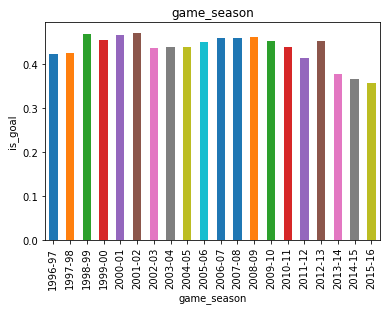

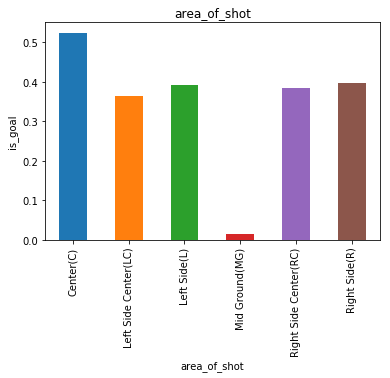

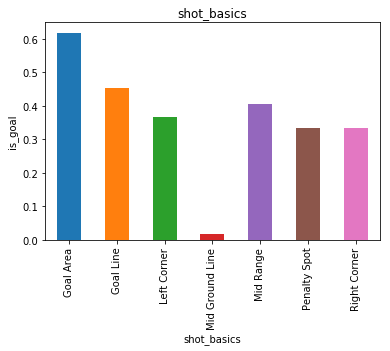

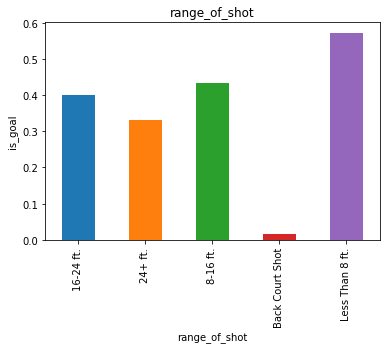

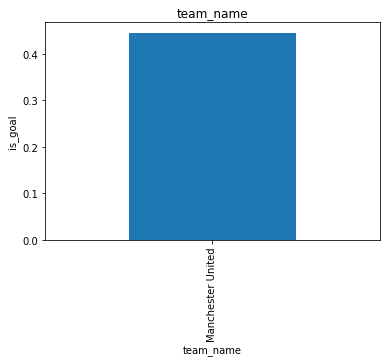

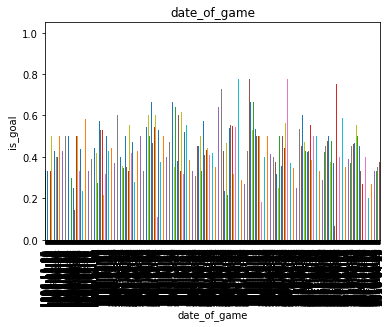

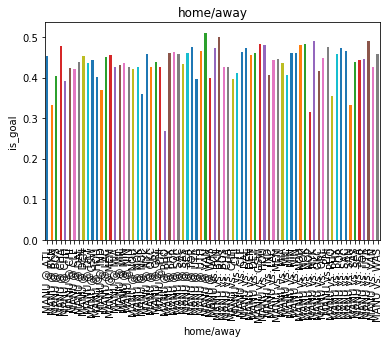

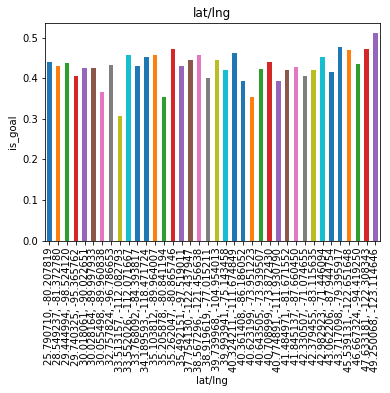

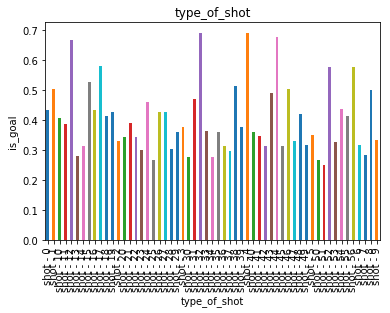

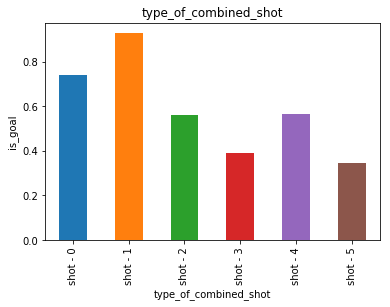

In [0]:
def analyse_cat(df, var):
    df = df.copy()
    df.groupby(var)['is_goal'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('is_goal')
    plt.show()

for var in cat_vars:
    analyse_cat(data,var)

In [0]:
data['home/away'].unique()

array(['MANU @ POR', nan, 'MANU vs. UTA', 'MANU @ VAN', 'MANU vs. LAC',
       'MANU @ HOU', 'MANU @ SAS', 'MANU vs. HOU', 'MANU vs. DEN',
       'MANU @ SAC', 'MANU @ DEN', 'MANU vs. CHI', 'MANU vs. GSW',
       'MANU vs. MIN', 'MANU @ LAC', 'MANU vs. IND', 'MANU @ SEA',
       'MANU vs. SAS', 'MANU vs. DAL', 'MANU vs. PHI', 'MANU @ GSW',
       'MANU vs. SEA', 'MANU vs. DET', 'MANU vs. MIL', 'MANU vs. VAN',
       'MANU @ TOR', 'MANU @ MIA', 'MANU @ DAL', 'MANU vs. POR',
       'MANU @ PHX', 'MANU vs. CLE', 'MANU @ UTA', 'MANU vs. MIA',
       'MANU vs. NJN', 'MANU @ NYK', 'MANU @ CLE', 'MANU @ MIN',
       'MANU vs. CHH', 'MANU vs. SAC', 'MANU vs. PHX', 'MANU @ NJN',
       'MANU @ PHI', 'MANU @ CHH', 'MANU @ IND', 'MANU vs. TOR',
       'MANU @ DET', 'MANU @ WAS', 'MANU @ ORL', 'MANU @ ATL',
       'MANU @ MIL', 'MANU vs. NYK', 'MANU vs. MEM', 'MANU vs. ORL',
       'MANU @ MEM', 'MANU @ CHI', 'MANU vs. WAS', 'MANU vs. ATL',
       'MANU vs. BOS', 'MANU @ BOS', 'MANU vs. NOH', 'MAN

### We are done with exploration of data now hence let us move to divide into train and test set and perform operations we did above

1- Divide into train and test sets where the Is_goal==NaN.
2- Fill na values for both train and test-->numerical values first
3- Divide df_train into X and y
4- Log transform the numerical vars in X and same operation in df_test
4- handle outliers
5- Understand various values categorical values by replacing them for ex: in Home/away just replace anything other then MANU @ POR as 1 and rest as 0
6- Drop not needed cat variables and one hot encoding.
7- Run Model on df_train
8- find predictions on df_test





1- Divide into train and test set

In [0]:
#Test set
df_test = data[data.is_goal.isna()]
df_test.drop(columns = ['is_goal','shot_id_number'],inplace = True)
# #Train set
df_train = data[~data['is_goal'].isna()]

In [0]:
df_test.columns
df_train.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'team_name', 'date_of_game', 'home/away', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

2- fill the NaN values for numerical variables in Train and Test set both using Imputer. Filling Numerical cols with Mean and Cat cols with most frequent label

In [0]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer, StandardScaler

In [0]:
# Running on Training set
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, df_train, y=None):

        self.fill = pd.Series([df_train[c].value_counts().index[0]
            if df_train[c].dtype == np.dtype('O') else df_train[c].mean() for c in df_train],
            index=df_train.columns)

        return self

    def transform(self, df_train, y=None):
        return df_train.fillna(self.fill,inplace = True)


In [0]:
# Calling function
DataFrameImputer().fit_transform(df_train)

In [0]:
# Running on Test set
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, df_test, y=None):

        self.fill = pd.Series([df_test[c].value_counts().index[0]
            if df_test[c].dtype == np.dtype('O') else df_test[c].mean() for c in df_test],
            index=df_test.columns)

        return self

    def transform(self, df_test, y=None):
        return df_test.fillna(self.fill,inplace = True)


In [0]:
# Calling function
DataFrameImputer().fit_transform(df_test)

In [0]:
# Verify is null value existing:
vars_with_na_train = [var for var in df_train.columns if df_train[var].isnull().sum()>1]
vars_with_na_train

vars_with_na_test = [var for var in df_test.columns if df_test[var].isnull().sum()>1]
vars_with_na_test

[]

[]

2- Divide into independent and target for df_train

In [0]:
X = df_train.drop(columns=['is_goal','shot_id_number'])
y = df_train['is_goal']

3- Log transformation for numerical vars in X

In [0]:
# Find the numerical vars

num_vars = [var for var in X.columns if X[var].dtypes != 'O']

print('Number of num variables:', len(num_vars))

Number of num variables: 15


In [0]:
X[num_vars].head()

match_event_id  location_x  ...  remaining_sec.1  distance_of_shot.1
1            12.0      -157.0  ...        22.000000                35.0
2            35.0      -101.0  ...        63.721600                54.4
3            43.0       138.0  ...        52.000000                42.0
4           155.0         0.0  ...        19.000000                20.0
5           244.0      -145.0  ...        38.849996                34.0

[5 rows x 15 columns]

In [0]:
def analyse_continous(df, var):
#     df = df.copy()
    
    # log transformation to avoid negative value.
    if 0 in df[var].unique():
        pass
    else:
      df[var] = np.log(df[var])
        
for var in X[num_vars]:
    analyse_continous(X, var)

In [0]:
X.head()

match_event_id  location_x  ...  remaining_sec.1  distance_of_shot.1
1        2.484907      -157.0  ...        22.000000            3.555348
2        3.555348      -101.0  ...        63.721600            3.996364
3        3.761200       138.0  ...        52.000000            3.737670
4        5.043425         0.0  ...        19.000000            2.995732
5        5.497168      -145.0  ...        38.849996            3.526361

[5 rows x 25 columns]

Log Transformation for test set

In [0]:
num_vars_test = [var for var in df_test.columns if df_test[var].dtypes != 'O']

print('Number of num variables:', len(num_vars_test))

Number of num variables: 15


In [0]:
def log_transform(df,var):
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])

for var in df_test[num_vars_test]:
    log_transform(df_test,var)

In [0]:
df_test.head(3)

match_event_id  location_x  ...  remaining_sec.1  distance_of_shot.1
0         2.302585       167.0  ...             54.2            3.637586
7         5.537334         1.0  ...              5.0            3.091042
16        4.605170         0.0  ...              1.0            2.995732

[3 rows x 25 columns]

### Outliers
4- Outlier Handling for Numerical Variables in Training and Test set

In [0]:
# Outlier on Training Set first


IQR = X.quantile(0.75) - X.quantile(0.25) 
print ('Lower outliers' '\n', X.quantile(0.25) - (1.5 * IQR ))
print ('\n')
print ('Higher outliers' '\n',X.quantile(0.75) + (1.5 * IQR ))  


Lower outliers
 match_event_id          3.118653
location_x           -282.500000
location_y           -216.500000
remaining_min          -7.000000
power_of_shot           0.084950
knockout_match          0.000000
remaining_sec         -28.000000
distance_of_shot        2.611922
match_id               16.284905
team_id                21.199881
remaining_min.1        -9.000000
power_of_shot.1        -0.681289
knockout_match.1       -1.500000
remaining_sec.1       -31.500000
distance_of_shot.1      2.563308
dtype: float64


Higher outliers
 match_event_id          7.546575
location_x            313.500000
location_y            379.500000
remaining_min          17.000000
power_of_shot           1.706810
knockout_match          0.000000
remaining_sec          84.000000
distance_of_shot        4.335054
match_id               17.754327
team_id                21.199881
remaining_min.1        23.000000
power_of_shot.1         2.983874
knockout_match.1        2.500000
remaining_sec.1       100.

In [0]:
X.describe().transpose()

count       mean  ...         75%         max
match_event_id      24429.0   5.197527  ...    5.886104    6.481577
location_x          24429.0   7.494178  ...   90.000000  248.000000
location_y          24429.0  89.960812  ...  156.000000  343.000000
remaining_min       24429.0   4.881044  ...    8.000000   11.000000
power_of_shot       24429.0   0.803818  ...    1.098612    1.945910
knockout_match      24429.0   0.145712  ...    0.000000    1.000000
remaining_sec       24429.0  28.289788  ...   42.000000   59.000000
distance_of_shot    24429.0   3.470417  ...    3.688879    4.595120
match_id            24429.0  16.985712  ...   17.203294   17.725533
team_id             24429.0  21.199881  ...   21.199881   21.199881
remaining_min.1     24429.0  18.151628  ...   11.000000  128.761600
power_of_shot.1     24429.0   1.538485  ...    1.609438    4.773731
knockout_match.1    24429.0  16.520622  ...    1.000000  141.352320
remaining_sec.1     24429.0  38.849996  ...   51.000000  144.785600
distance_of_shot.1  24429.0   3.567293  ...    3.784190    4.751243

[15 rows x 8 columns]

outliers in: location_y , power_of_shot, 
Will handle Outlier later in another submission


In [0]:
mean = X['location_y'].mean(skipna = True)
mean
X['location_y'] = np.where((X['location_y'] - mean).abs() > (3*X.location_y.std()),mean,X['location_y'])


91.46118012422332

In [0]:
# Outliers in Test Set 
IQR = df_test.quantile(0.75) - df_test.quantile(0.25) 
print ('Lower outliers' '\n', df_test.quantile(0.25) - (1.5 * IQR ))
print ('\n')
print ('Higher outliers' '\n',df_test.quantile(0.75) + (1.5 * IQR ))  


Lower outliers
 match_event_id          3.085107
location_x           -285.000000
location_y           -218.500000
remaining_min          -7.000000
power_of_shot          -1.647918
knockout_match          0.000000
remaining_sec         -25.500000
distance_of_shot        2.513870
match_id               16.284881
team_id                21.199881
remaining_min.1       -20.117515
power_of_shot.1        -0.681289
knockout_match.1       -1.500000
remaining_sec.1       -29.000000
distance_of_shot.1      2.468957
dtype: float64


Higher outliers
 match_event_id          7.579980
location_x            315.000000
location_y            377.500000
remaining_min          17.000000
power_of_shot           2.746531
knockout_match          0.000000
remaining_sec          82.500000
distance_of_shot        4.393885
match_id               17.754376
team_id                21.199881
remaining_min.1        41.529192
power_of_shot.1         2.983874
knockout_match.1        2.500000
remaining_sec.1        99.

In [0]:
df_test.describe().transpose()

count       mean  ...         75%         max
match_event_id      6268.0   5.198751  ...    5.894403    6.490724
location_x          6268.0   6.953379  ...   90.000000  248.000000
location_y          6268.0  88.723753  ...  153.000000  319.000000
remaining_min       6268.0   4.891765  ...    8.000000   11.000000
power_of_shot       6268.0   0.797582  ...    1.098612    1.791759
knockout_match      6268.0   0.146906  ...    0.000000    1.000000
remaining_sec       6268.0  28.484301  ...   42.000000   59.000000
distance_of_shot    6268.0   3.467270  ...    3.688879    4.394449
match_id            6268.0  16.989520  ...   17.203315   17.725533
team_id             6268.0  21.199881  ...   21.199881   21.199881
remaining_min.1     6268.0  18.411677  ...   18.411677  128.761600
power_of_shot.1     6268.0   1.537585  ...    1.609438    4.773731
knockout_match.1    6268.0  16.904773  ...    1.000000  137.608000
remaining_sec.1     6268.0  39.721966  ...   51.000000  144.785600
distance_of_shot.1  6268.0   3.567117  ...    3.784190    4.751243

[15 rows x 8 columns]

In [0]:
mean = df_test['location_y'].mean(skipna = True)
mean
df_test['location_y'] = np.where((df_test['location_y'] - mean).abs() > (3*df_test.location_y.std()),mean,df_test['location_y'])


89.82956638205249

In [0]:
# We will handle outliers later

5- Handle Cat Variables

In [0]:
cat_vars = [var for var in df_test.columns if df_test[var].dtypes == 'O']
print('Number of categorical variables: ', len(cat_vars))

NameError: ignored

In [0]:
cat_vars

['game_season',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'team_name',
 'date_of_game',
 'home/away',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot']

In [0]:
for var in cat_vars:
    print(var,len(df_test[var].unique()),'categories')

game_season 20 categories
area_of_shot 6 categories
shot_basics 7 categories
range_of_shot 5 categories
team_name 1 categories
date_of_game 1497 categories
home/away 74 categories
lat/lng 38 categories
type_of_shot 57 categories
type_of_combined_shot 6 categories


In [0]:
# Dropping some cat variables which do not have dependency on Goals

In [0]:
X.drop(columns=['game_season','date_of_game'], axis = 1, inplace=True)
df_test.drop(columns=['game_season','date_of_game'], axis = 1, inplace=True)

In [0]:
# replacing the left side and right side with single value as from analysis both have equal probs of goal.
X['area_of_shot']= X['area_of_shot'].replace({
                                          'Left Side Center(LC)': 'Left Side(L)',
                                          'Right Side Center(RC)': 'Right Side(R)',
                                         
                                          })

In [0]:
df_test['area_of_shot']= df_test['area_of_shot'].replace({
                                          'Left Side Center(LC)': 'Left Side(L)',
                                          'Right Side Center(RC)': 'Right Side(R)',
                                         
                                          })

In [0]:
# X.drop(columns=['team_name','lat/lng','type_of_shot','team_id'], inplace = True)
# df_test.drop(columns=['team_name','lat/lng','type_of_shot','team_id'], inplace = True)

In [0]:

X.drop(columns=['team_name','team_id'], inplace = True)
df_test.drop(columns=['team_name','team_id'], inplace = True)



In [0]:
# In Home/away there are issues with @ and vs. hence making it similar

In [0]:
X['home/away'] = X['home/away'].str.replace('vs.', '@')

In [0]:

df_test['home/away'] = df_test['home/away'].str.replace('vs.', '@')

In [0]:
X['home/away'].unique()

array(['MANU @ POR', 'MANU @ SAS', 'MANU @ UTA', 'MANU @ VAN',
       'MANU @ LAC', 'MANU @ HOU', 'MANU @ DEN', 'MANU @ SAC',
       'MANU @ CHI', 'MANU @ GSW', 'MANU @ MIN', 'MANU @ IND',
       'MANU @ SEA', 'MANU @ DAL', 'MANU @ PHI', 'MANU @ DET',
       'MANU @ MIL', 'MANU @ TOR', 'MANU @ MIA', 'MANU @ PHX',
       'MANU @ CLE', 'MANU @ NJN', 'MANU @ NYK', 'MANU @ CHH',
       'MANU @ WAS', 'MANU @ ORL', 'MANU @ ATL', 'MANU @ MEM',
       'MANU @ BOS', 'MANU @ NOH', 'MANU @ UTH', 'MANU @ SAN',
       'MANU @ NOK', 'MANU @ PHO', 'MANU @ CHA', 'MANU @ OKC',
       'MANU @ BKN', 'MANU @ NOP'], dtype=object)

In [0]:
X.groupby('home/away').count().sort_values(ascending = False, by = 'home/away')

match_event_id  location_x  ...  remaining_sec.1  distance_of_shot.1
home/away                               ...                                     
MANU @ WAS             451         451  ...              451                 451
MANU @ VAN             187         187  ...              187                 187
MANU @ UTH              15          15  ...               15                  15
MANU @ UTA            1086        1086  ...             1086                1086
MANU @ TOR             496         496  ...              496                 496
MANU @ SEA             630         630  ...              630                 630
MANU @ SAS            2674        2674  ...             2674                2674
MANU @ SAN              18          18  ...               18                  18
MANU @ SAC            1265        1265  ...             1265                1265
MANU @ POR            1173        1173  ...             1173                1173
MANU @ PHX            1351        1351  ...             1351                1351
MANU @ PHO              57          57  ...               57                  57
MANU @ PHI             551         551  ...              551                 551
MANU @ ORL             543         543  ...              543                 543
MANU @ OKC             514         514  ...              514                 514
MANU @ NYK             514         514  ...              514                 514
MANU @ NOP              80          80  ...               80                  80
MANU @ NOK             177         177  ...              177                 177
MANU @ NOH             429         429  ...              429                 429
MANU @ NJN             385         385  ...              385                 385
MANU @ MIN            1103        1103  ...             1103                1103
MANU @ MIL             453         453  ...              453                 453
MANU @ MIA             473         473  ...              473                 473
MANU @ MEM             791         791  ...              791                 791
MANU @ LAC             967         967  ...              967                 967
MANU @ IND             569         569  ...              569                 569
MANU @ HOU            1257        1257  ...             1257                1257
MANU @ GSW            1024        1024  ...             1024                1024
MANU @ DET             533         533  ...              533                 533
MANU @ DEN            1220        1220  ...             1220                1220
MANU @ DAL             917         917  ...              917                 917
MANU @ CLE             457         457  ...              457                 457
MANU @ CHI             477         477  ...              477                 477
MANU @ CHH             119         119  ...              119                 119
MANU @ CHA             330         330  ...              330                 330
MANU @ BOS             703         703  ...              703                 703
MANU @ BKN              42          42  ...               42                  42
MANU @ ATL             398         398  ...              398                 398

[38 rows x 20 columns]

considering MANU@POR is the homeground and rest as away. Replace MANU@POR with Home and rest with away

In [0]:
X['home/away'] = X['home/away'].str.replace('MANU @ POR', 'Home')
X['home/away'] = np.where(X['home/away'] != 'Home','Away',X['home/away'])


In [0]:
df_test['home/away'] = df_test['home/away'].str.replace('MANU @ POR', 'Home')
df_test['home/away'] = np.where(df_test['home/away'] != 'Home','Away',df_test['home/away'])



In [0]:
# data.groupby('type_of_shot')['area_of_shot'].value_counts()

In [0]:
# X.columns.value_counts()

In [0]:
df_test.columns.value_counts()

area_of_shot             1
lat/lng                  1
match_id                 1
type_of_combined_shot    1
remaining_min            1
power_of_shot.1          1
remaining_sec.1          1
home/away                1
type_of_shot             1
knockout_match           1
range_of_shot            1
remaining_min.1          1
shot_basics              1
power_of_shot            1
distance_of_shot.1       1
knockout_match.1         1
distance_of_shot         1
remaining_sec            1
location_x               1
location_y               1
match_event_id           1
dtype: int64

In [0]:
# Converting Categorical vars into one Hot encoding

In [0]:
X = pd.get_dummies(X, columns=['area_of_shot',
 'shot_basics',
 'range_of_shot',
 'home/away',
 'type_of_combined_shot','type_of_shot','lat/lng'])

In [0]:
df_test = pd.get_dummies(df_test, columns=['area_of_shot',
 'shot_basics',
 'range_of_shot',
 'home/away',
 'type_of_combined_shot','type_of_shot','lat/lng'])

In [0]:
X.shape
y.shape

(24429, 133)

(24429,)

In [0]:
df_test.shape

(6268, 133)

In [0]:
# Split the train test and then followed by pipeline

In [0]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [0]:
# Stacking example

In [0]:
pipeline_1_st = Pipeline([('sc', StandardScaler()),('sv', SVC(probability=True))])

pipeline_2_st = Pipeline([('sc', StandardScaler()),('bg', BaggingClassifier(random_state=2))])

pipeline_3_st = Pipeline([('sc', StandardScaler()),('XGBR', XGBClassifier(seed = 2))])

In [0]:
# Random search on Pipelines

param_grid_rv = {'sv__kernel':['linear', 'rbf', 'poly'],
                 'sv__gamma':[0.1, 1, 10, 100],
                 'sv__C':[0.1, 0.5, 0.5, 1, 2, 3, 4],
                 'sv__degree' : [0, 1, 2, 3, 4, 5, 6]
                }


param_grid_bg = { 'bg__n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)],
                 'bg__max_samples':[0.1, 0.5, 0.5, 1, 2, 3, 4],
                                 }

param_grid_XGB = {
'XGBR__max_depth':range(3,10,2),
'XGBR__min_child_weight':range(1,6,2),
'XGBR__gamma':[i/10.0 for i in range(0,5)],
'XGBR__subsample':[i/10.0 for i in range(6,10)],
'XGBR__colsample_bytree':[i/10.0 for i in range(6,10)],
'XGBR__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
'XGBR__learning_rate' : [0.1,0.001,0.3] ,
'XGBR__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
'XGBR__nthread' : [2,3,5] , 
'XGBR__scale_pos_weight' : 1,
'XGBR__scale_pos_weight': [1,2]
    }

In [0]:
RandomCV_1 = RandomizedSearchCV(pipeline_1_st,param_grid_rv,cv=5)
RandomCV_1.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomCV_1.best_estimator_))
print ('\n')
print ("The Score for SVC is {}".format(RandomCV_1.score(X_test,y_test)))

RandomCV_2 = RandomizedSearchCV(pipeline_2_st,param_grid_bg,cv=5)
RandomCV_2.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomCV_2.best_estimator_))
print ('\n')
print ("The Score for BG is {}".format(RandomCV_2.score(X_test,y_test)))

RandomCV_3 = RandomizedSearchCV(pipeline_3_st,param_grid_XGB,cv=5)
RandomCV_3.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomCV_3.best_estimator_))
print ('\n')
print ("The Score for XGB is {}".format(RandomCV_3.score(X_test,y_test)))




In [0]:
# pipeline_1_st.fit(X_train,y_train)
# pipeline_2_st.fit(X_train,y_train)
# pipeline_3_st.fit(X_train,y_train)

In [0]:
# On Validation data Preds
# pred1 = pipeline_1_st.predict(X_test)
# pred2 = pipeline_2_st.predict(X_test)


pred1 = RandomCV_1.predict(X_test)
pred2 = RandomCV_2.predict(X_test)
pred3 = RandomCV_3.predict(X_test)

In [0]:
#Train Prediction

In [0]:
# Calculate mean absolute error




In [0]:
# Preds on Test Data 
# test_pred1 = pipeline_1_st.predict(df_test)
# test_pred2 = pipeline_2_st.predict(df_test)


test_pred1 = RandomCV_1.predict(df_test)
test_pred2 = RandomCV_2.predict(df_test)
test_pred3 = RandomCV_3.predict(df_test)

In [0]:
# Form a new dataset for valid and test via stacking predictions
stacked_Preds = np.column_stack((pred1,pred2,pred3))
stacked_test_predictions = np.column_stack((test_pred1,test_pred2,test_pred3))

In [0]:
meta_model = XGBClassifier()

In [0]:
# #Random SearchCV

# param_grid_XGB = {
# 'max_depth':range(3,10,2),
# 'min_child_weight':range(1,6,2),
# 'gamma':[i/10.0 for i in range(0,5)],
# 'subsample':[i/10.0 for i in range(6,10)],
# 'colsample_bytree':[i/10.0 for i in range(6,10)],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
# 'learning_rate' : [0.1,0.001,0.3] ,
# 'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
# 'nthread' : [2,3,5] , 
# 'scale_pos_weight' : 1,
# 'scale_pos_weight': [1,2]
#     }

# RandomCV = RandomizedSearchCV(meta_model,param_grid_XGB,cv=5)
# RandomCV.fit(stacked_Preds,y_test)
# print ('\n')
# print ("Best Parameter for RandomCV is {}".format(RandomCV.best_estimator_))
# print ('\n')
# print ("The Score for XGB is {}".format(RandomCV.score(stacked_Preds,y_test)))

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                        'learning_rate': [0.1, 0.001, 0.3],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),




Best Parameter for RandomCV is XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=10, n_jobs=1,
              nthread=3, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


The Score for XGB is 0.6239596124982945


In [0]:
meta_model.fit(stacked_Preds,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
meta_model.score(stacked_Preds,y_test)

0.6239596124982945

In [0]:
final_preds = meta_model.predict_proba(stacked_test_predictions)

In [0]:
final_preds

array([[0.6218939 , 0.3781061 ],
       [0.57542086, 0.42457917],
       [0.44972157, 0.5502784 ],
       ...,
       [0.2912423 , 0.7087577 ],
       [0.6218939 , 0.3781061 ],
       [0.6218939 , 0.3781061 ]], dtype=float32)

In [0]:
# Stacking using mlens
!pip install mlens

     |████████████████████████████████| 235kB 6.7MB/s 


In [0]:
from mlens.metrics import make_scorer
from mlens.model_selection import Evaluator

# Ensemble
from mlens.ensemble import SuperLearner
from scipy.stats import uniform, randint


In [0]:
svc = SVC()
bgcl = BaggingClassifier( )  #the base_estimator can be null. The bagging classifer  will build it's own tree
xgbl = XGBClassifier()



base_learners = [
('svc',svc),
('bgcl',bgcl),
('xgbl',xgbl)
]

In [0]:
# P = np.zeros((X_test.shape[0], len(base_learners)))
# P = pd.DataFrame(P, columns=[e for e, _ in base_learners])


for est_name,est in base_learners:
    est.fit(X_train, y_train)
    p = est.predict_proba(X_test)
    P.loc[:, est_name] = p
    print("%3s : %.4f" % (est_name,score(X_test,y_test) *100))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

AttributeError: ignored

In [0]:
param_dicts = {
    
    'svc':  { 
        'gamma':uniform(0.1, 1),
                 'C':uniform(0.1, 0.5),
                 'degree' : uniform(0, 1)
                
                  },
    
    'bgcl':  
          {
        'n_estimators' : randint(150, 200),
        
            },
    
    'xgbl':{
        
'learning_rate': uniform(0.02, 0.04),
     'colsample_bytree': uniform(0.55, 0.66),
     'min_child_weight': randint(30, 60),
     'max_depth': randint(3, 10),
     'subsample': uniform(0.4, 0.2),
     'n_estimators': randint(150, 200),
     'colsample_bytree': uniform(0.6, 0.4),
     'reg_gamma': uniform(1, 2),
     'scale_pos_weight': uniform(1, 2),
        'nthread': randint(2,3)
    }
    
    }

    
    


In [0]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

evl = Evaluator(
    scorer,
    cv=3,
    random_state=1234,
    verbose=5,
)

In [0]:
evl.fit(
    X_train, y_train,
    estimators=base_learners,
    param_dicts=param_dicts,
    preprocessing={'sc': [StandardScaler()],'none': []},
    n_iter = 2
)

Launching job
Preprocessing 2 preprocessing pipelines over 3 CV folds
Preprocessing done | 00:00:00
Evaluating 6 models for 2 parameter draws over 2 preprocessing pipelines and 3 CV folds, totalling 36 fits
Evaluation    done | 00:20:38
Job           done | 00:20:39


In [0]:
pd.DataFrame(evl.results)


test_score-m  ...                                             params
none.bgcl     -0.378246  ...                              {'n_estimators': 197}
none.svc      -0.440468  ...  {'gamma': 0.29151945037889226, 'C': 0.19575972...
none.xgbl     -0.419298  ...  {'learning_rate': 0.027660778015155693, 'colsa...
sc.bgcl       -0.378070  ...                              {'n_estimators': 169}
sc.svc        -0.435673  ...  {'gamma': 0.29151945037889226, 'C': 0.19575972...
sc.xgbl       -0.421111  ...  {'learning_rate': 0.027660778015155693, 'colsa...

[6 rows x 9 columns]

In [0]:
for case_name, params in evl.results["params"].items():
    case, case_est = case_name.split('.')
    for est_name, est in base_learners:
        if est_name == case_est:
            est.set_params(**params)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=197,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

SVC(C=0.19575972518944615, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0.1915194503788923,
    gamma=0.29151945037889226, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6766077801515569, gamma=0,
              learning_rate=0.027660778015155693, max_delta_step=0, max_depth=6,
              min_child_weight=45, missing=None, n_estimators=197, n_jobs=1,
              nthread=2, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_gamma=1.3830389007577846, reg_lambda=1,
              scale_pos_weight=1.3830389007577846, seed=None, silent=None,
              subsample=0.43830389007577847, verbosity=1)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=169,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

SVC(C=0.19575972518944615, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0.1915194503788923,
    gamma=0.29151945037889226, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6766077801515569, gamma=0,
              learning_rate=0.027660778015155693, max_delta_step=0, max_depth=6,
              min_child_weight=45, missing=None, n_estimators=197, n_jobs=1,
              nthread=2, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_gamma=1.3830389007577846, reg_lambda=1,
              scale_pos_weight=1.3830389007577846, seed=None, silent=None,
              subsample=0.43830389007577847, verbosity=1)

In [0]:
meta_learners = [
    ('svc', svc), ('xgbl', xgbl)
]

# Note that when we have a preprocessing pipeline,
# keys are in the (prep_name, est_name) format
param_dicts = {
    'svc':  { 
        'gamma':uniform(0.1, 1),
                 'C':uniform(0.1, 0.5),
                 'degree' : uniform(0, 1)
                
                  },
    
    'xgbl':{
        
'learning_rate': uniform(0.02, 0.04),
     'colsample_bytree': uniform(0.55, 0.66),
     'min_child_weight': randint(30, 60),
     'max_depth': randint(3, 10),
     'subsample': uniform(0.4, 0.2),
     'n_estimators': randint(150, 200),
     'colsample_bytree': uniform(0.6, 0.4),
     'reg_gamma': uniform(1, 2),
     'scale_pos_weight': uniform(1, 2),
        'nthread': randint(2,3)
    },
}

In [0]:
in_layer = SuperLearner(model_selection=True)
in_layer.add(base_learners)

preprocess = [in_layer]

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=True, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [0]:
np.array(y_train)

array([1., 1., 0., ..., 0., 0., 1.])

In [0]:
evl.fit(
    X_train, y_train,
    meta_learners,
    param_dicts,
    preprocessing={'meta': preprocess},
    n_iter=4                            # bump this up to do a larger grid search
)

Launching job
Preprocessing 1 preprocessing pipelines over 3 CV folds


JoblibTypeError: ignored

In [0]:
meta_learner = meta_learners[1][1]
meta_learner.set_params(**evl.results["params"]["meta.el"])

# We can grab the preprocessing layer and turn model selection off
ens = in_layer
ens.model_selection = False
ens.add_meta(meta_learner)

KeyError: ignored

In [0]:
#Bagging

In [0]:
pipeline = Pipeline([('sc', StandardScaler()),('bg', BaggingClassifier())])

In [0]:
param_grid_bg = {'bg__base_estimator ':['linear', 'rbf', 'poly'],
                 'bg__n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)],
                 'bg__max_samples':[0.1, 0.5, 0.5, 1, 2, 3, 4],
                 'bg__degree' : [0, 1, 2, 3, 4, 5, 6]
                }

In [0]:
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [0]:
#SVC 

In [0]:
pipeline = Pipeline([('sc', StandardScaler()),('sv', SVC(probability=True))])

NameError: ignored

In [0]:
param_grid_rv = {'sv__kernel':['linear', 'rbf', 'poly'],
                 'sv__gamma':[0.1, 1, 10, 100],
                 'sv__C':[0.1, 0.5, 0.5, 1, 2, 3, 4],
                 'sv__degree' : [0, 1, 2, 3, 4, 5, 6]
                }

In [0]:
RandomSearch = RandomizedSearchCV(pipeline,param_grid_rv,cv = 3)
RandomSearch.fit(X_train,y_train)
print ("Best Parameter for RandomCV is {}".format(RandomSearch.best_estimator_))
# pred = RandomSearch.predict(X_test)
# print('\n')
print ('Score after Hyperparameter tuning {}' .format(RandomSearch.score(X_test,y_test) *100))

In [0]:
pred = pipeline.predict(X_test)
print ('Score without Hyperparameter tuning {}' .format(pipeline.score(X_test,y_test) *100))
print ('\n')
print ((classification_report(y_test,pred)))
print ('\n')

print (confusion_matrix(y_test,pred))

Score without Hyperparameter tuning 60.49938600081867


              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70      6719
         1.0       0.62      0.32      0.42      5496

   micro avg       0.60      0.60      0.60     12215
   macro avg       0.61      0.58      0.56     12215
weighted avg       0.61      0.60      0.57     12215



[[5636 1083]
 [3742 1754]]


In [0]:
# XGB--XGBOOSTClassifier

In [0]:
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [0]:
seed = 2

pipeline_XGB = Pipeline([
                     ("sc", StandardScaler()),
             ("XGBR", XGBClassifier(seed=seed))
                 ])


In [0]:
param_grid_XGB = {
'XGBR__max_depth':range(3,10,2),
'XGBR__min_child_weight':range(1,6,2),
'XGBR__gamma':[i/10.0 for i in range(0,5)],
'XGBR__subsample':[i/10.0 for i in range(6,10)],
'XGBR__colsample_bytree':[i/10.0 for i in range(6,10)],
'XGBR__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
'XGBR__learning_rate' : [0.1,0.001,0.3] ,
'XGBR__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
'XGBR__nthread' : [2,3,5] , 
'XGBR__scale_pos_weight' : 1,
'XGBR__scale_pos_weight': [1,2]
    }


In [0]:
RandomCV = RandomizedSearchCV(pipeline_XGB,param_grid_XGB,cv=5)
RandomCV.fit(X_train,y_train)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomCV.best_estimator_))
print ('\n')
print ("The Score for XGB is {}".format(RandomCV.score(X_test,y_test)))


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('sc',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('XGBR',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
               



Best Parameter for RandomCV is Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGBR',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, gamma=0.4,
                               learning_rate=0.1, max_delta_step=0, max_depth=3,
                               min_child_weight=5, missing=None,
                               n_estimators=500, n_jobs=1, nthread=2,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
                               seed=2, silent=None, subsample=0.8,
                               verbosity=1))],
         verbose=False)


The Score for XGB is 0.6164551780597626


In [0]:
#Stacking

In [0]:
lrcl = LogisticRegression(random_state=1)
rfcl = SVC(kernel='rbf',tol =0.001, probability = True,C = 1.0,degree=3)
nbcl = GaussianNB()
bgcl = BaggingClassifier( n_estimators=200)  #the base_estimator can be null. The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')

# stack = VotingClassifier(estimators = [('lor', lrcl), ('nb', nbcl), ('dt', dt_model)], voting = 'hard')

#hard voting- integral count
#soft voting- convert into percentage

In [0]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'SVClassifier', 'NaiveBayes', 'Stacking', 'Bagging']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.56 (+/- 0.00) [Logistic Regression]
Accuracy: 0.56 (+/- 0.00) [SVClassifier]
Accuracy: 0.56 (+/- 0.00) [NaiveBayes]
Accuracy: 0.56 (+/- 0.00) [Stacking]
Accuracy: 0.62 (+/- 0.01) [Bagging]


In [0]:
pred = RandomCV.predict_proba(df_test)

In [0]:
y_pred_Prob = RandomCV.predict_proba(df_test) [:,1]

In [0]:
y_pred_Prob

array([0.502183  , 0.49926376, 0.4995802 , ..., 0.50793624, 0.5032431 ,
       0.49968502], dtype=float32)

In [0]:
df_out = pd.DataFrame(y_pred_Prob, columns=['is_goal'])

In [0]:
from google.colab import drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:

df_out.to_csv('predictprob_v4.csv')

!cp predictprob_v4.csv drive/My\ Drive/

In [0]:
data[data.is_goal.isnull()]['shot_id_number']

0            1.0
7            8.0
16           NaN
19          20.0
21          22.0
32          33.0
33           NaN
34          35.0
35          36.0
36          37.0
37          38.0
44          45.0
49          50.0
54          55.0
59          60.0
61          62.0
65          66.0
66          67.0
70          71.0
71          72.0
75          76.0
79          80.0
84          85.0
85          86.0
86          87.0
91          92.0
94          95.0
96           NaN
103        104.0
112        113.0
          ...   
30567    30568.0
30569    30570.0
30580    30581.0
30583    30584.0
30590    30591.0
30593    30594.0
30613    30614.0
30616    30617.0
30617    30618.0
30625    30626.0
30629    30630.0
30630    30631.0
30631    30632.0
30633    30634.0
30635        NaN
30636    30637.0
30638    30639.0
30646    30647.0
30648    30649.0
30655    30656.0
30659    30660.0
30664    30665.0
30668    30669.0
30679        NaN
30680    30681.0
30681    30682.0
30682    30683.0
30686    30687

In [0]:
# Adaboost

In [0]:
pipeline_XAB = Pipeline([
                     ("sc", StandardScaler()),
           ("ADA-clf", AdaBoostClassifier(n_estimators= 200))
                 ])

In [0]:
pipeline_XAB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ADA-clf',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=200,
                                    random_state=None))],
         verbose=False)

In [0]:
pred = pipeline_XAB.predict_proba(df_test)
print ('Score without Hyperparameter tuning {}' .format(pipeline_XAB.score(X_test,y_test *100)))
# print ('\n')
# print ((classification_report(testy,pred)))
# print ('\n')
# print (confusion_matrix(testy,pred))

Score without Hyperparameter tuning 0.44767362532405514


In [0]:
# Stacking implementation

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [0]:
# Some useful parameters which will come in handy later on
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predic_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    

In [0]:
def get_oof(clf, x_train, y_train, df_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [0]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [0]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [0]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

In [0]:
# Impelementing NN Arcthitecture

In [0]:
import tensorflow as tf
import keras
tf.set_random_seed(42)
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [0]:
X.shape
y.shape
df_test.shape

(24429, 133)

(24429,)

(6268, 169)

In [0]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [0]:
trainX, testX, trainy,testy = train_test_split(X_sc,y,test_size=0.20,random_state=1)

In [0]:
trainX = np.array(trainX).astype('float32')
testX = np.array(testX).astype('float32')
trainy = np.array(trainy).astype('float32')
testy = np.array(testy).astype('float32')

In [0]:
from keras import Sequential
from keras.layers import Dense,Reshape,BatchNormalization
from keras import optimizers
from keras.optimizers import Adam,Adagrad,RMSprop

In [0]:
model1 = Sequential()
model1.add(Dense(100,activation='relu',input_shape=(133,)))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
#Dropout layer

In [0]:
# adam
opt = SGD(lr = 0.001, momentum = 0.9,decay=0.0, nesterov=False)

In [0]:
model1.compile(optimizer=opt, loss ='binary_crossentropy',metrics=['accuracy'])

In [0]:
# model1.save('DS_Challenge_v1.h5')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [0]:
# model = build_model(optimizer_Nadam)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# EPOCHS = 50
# history = model.fit(X_train,y_train,verbose=1,shuffle=True, epochs=EPOCHS,batch_size=32,validation_split=0.2, callbacks=[es, mc])

In [0]:
model1.fit(trainX,trainy, validation_data=(testX,testy),epochs = 50, batch_size= 40, validation_split= 0.2)

W0722 06:02:30.805381 140556482406272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 19543 samples, validate on 4886 samples
Epoch 1/50
19543/19543 [==============================] - 7s 333us/step - loss: 0.6816 - acc: 0.5651 - val_loss: 0.6751 - val_acc: 0.5919
Epoch 2/50
19543/19543 [==============================] - 2s 126us/step - loss: 0.6707 - acc: 0.5929 - val_loss: 0.6671 - val_acc: 0.5929
Epoch 3/50
19543/19543 [==============================] - 2s 122us/step - loss: 0.6625 - acc: 0.6027 - val_loss: 0.6622 - val_acc: 0.6003
Epoch 4/50
19543/19543 [==============================] - 2s 124us/step - loss: 0.6566 - acc: 0.6120 - val_loss: 0.6577 - val_acc: 0.6097
Epoch 5/50
19543/19543 [==============================] - 2s 122us/step - loss: 0.6511 - acc: 0.6181 - val_loss: 0.6552 - val_acc: 0.6138
Epoch 6/50
19543/19543 [==============================] - 2s 124us/step - loss: 0.6471 - acc: 0.6232 - val_loss: 0.6526 - val_acc: 0.6146
Epoch 7/50
19543/19543 [==============================] - 2s 125us/step - loss: 0.6432 - acc: 0.6300 - val_loss: 0.6510 - v

In [0]:
# Predict the probability for test set.
# pred = model1.predict_proba(df_test)
pred = model1.predict_classes(testX)
pred_2 = model1.predict_proba(testX)
pred_3 = model1.predict(testX)


In [0]:
# print(pred)
# print(pred_2)
# print(pred_3)

for i in range(len(pred)):
  print(pred[i], pred_2[i], pred_3[i])
  print('------')

[0] [0.4353308] [0.4353308]
------
[0] [0.16359222] [0.16359222]
------
[0] [0.46354342] [0.46354342]
------
[0] [0.23385799] [0.23385799]
------
[0] [0.37032366] [0.37032366]
------
[0] [0.00919023] [0.00919023]
------
[1] [0.5918658] [0.5918658]
------
[0] [0.25875553] [0.25875553]
------
[0] [0.00763083] [0.00763083]
------
[1] [0.6032794] [0.6032794]
------
[0] [0.38369566] [0.38369566]
------
[1] [0.63372636] [0.63372636]
------
[0] [0.45165873] [0.45165873]
------
[1] [0.7273773] [0.7273773]
------
[1] [0.57379264] [0.57379264]
------
[1] [0.96433425] [0.96433425]
------
[0] [0.2796176] [0.2796176]
------
[0] [0.12354293] [0.12354293]
------
[0] [0.42933357] [0.42933357]
------
[0] [0.13163713] [0.13163713]
------
[0] [0.4012585] [0.4012585]
------
[1] [0.8851044] [0.8851044]
------
[1] [0.7746335] [0.7746335]
------
[0] [0.34470382] [0.34470382]
------
[0] [0.18555284] [0.18555284]
------
[1] [0.85067284] [0.85067284]
------
[1] [0.7089987] [0.7089987]
------
[0] [0.3305338] [0.

In [0]:
pred_round = np.around(pred, 3)

In [0]:
pred_round

array([[0.   ],
       [0.574],
       [0.504],
       ...,
       [0.002],
       [0.001],
       [0.479]], dtype=float32)

In [0]:
df_out = pd.DataFrame(pred_round, columns=['is_goal'])

In [0]:
df_out

is_goal
0       0.000
1       0.574
2       0.504
3       0.144
4       0.000
5       0.000
6       0.000
7       0.173
8       0.001
9       0.904
10      0.052
11      0.116
12      0.676
13      0.000
14      0.000
15      0.003
16      0.001
17      0.670
18      0.000
19      0.000
20      0.003
21      0.047
22      0.003
23      0.264
24      0.000
25      0.912
26      0.008
27      0.001
28      0.002
29      0.032
...       ...
6238    0.000
6239    0.162
6240    0.000
6241    0.473
6242    0.001
6243    0.200
6244    0.000
6245    0.716
6246    0.020
6247    0.000
6248    0.000
6249    0.081
6250    0.078
6251    0.032
6252    0.312
6253    0.750
6254    0.000
6255    0.000
6256    0.105
6257    0.002
6258    1.000
6259    0.006
6260    0.000
6261    0.348
6262    0.089
6263    0.000
6264    0.017
6265    0.002
6266    0.001
6267    0.479

[6268 rows x 1 columns]

In [0]:
from google.colab import drive
drive.mount('drive')

df_out.to_csv('predictprob_v3.csv')

!cp predictprob_v2.csv drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
df_out.to_csv('predictprob_v3.csv')

In [0]:
!cp predictprob_v2.csv drive/My\ Drive/

In [0]:
np.set_printoptions( threshold=20, edgeitems=10, linewidth=140,
    formatter = dict( float = lambda x: "%.3g" % pred )) 

In [0]:
pred

TypeError: ignored

In [0]:
model1.predict_proba(df_test)


TypeError: ignored

In [0]:
# pred = pipeline.predict_proba(df_test)
# print ('Score without Hyperparameter tuning {}' .format(pipeline.score(df_test,y_test) *100))
# print ('\n')
# print ((classification_report(y_test,pred)))
# print ('\n')

# print (confusion_matrix(y_test,pred))

In [0]:
y_pred_Prob = model2.predict_proba(df_test) [:,]

In [0]:
y_pred_Prob

array([[          -inf],
       [-4.6966367e+00],
       [-3.5841098e+00],
       ...,
       [-1.1277128e-02],
       [-1.1864848e+01],
       [-5.5470333e+00]], dtype=float32)

In [0]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_Prob], 0.5)[0]

ValueError: ignored

In [0]:
y_pred_class

array([0., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [0]:
df_out = pd.DataFrame(y_pred_Prob, columns=['is_goal'])

In [0]:

df_out.to_csv('predictprob.csv')

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
!cp predictprob.csv drive/My\ Drive/

In [0]:
df_test_subm = data[data.is_goal.isna()]

In [0]:
!pip install nbconvert

In [0]:
!jupyter nbconvert --to python DS_Challenge.ipynb

[NbConvertApp] WARNING | pattern u'DS_Challenge.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run 